<a href="https://colab.research.google.com/github/e-c-centric/56042025_Churning_Customers/blob/main/56042025_Churning_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

**Question 1**

In [ ]:
X = data.drop(columns=['customerID', 'Churn'])  #CustomerID is not a relevant independent variable because it is just an identifying key.
y = data['Churn'] #Churn is the target variable

In [ ]:
#Encoding categorical variables
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])
        X[col] = le.fit_transform(X[col])
y = le.fit_transform(y)
data['Churn'] = le.fit_transform(data['Churn'])

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
feature_importance = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
sorted_features

,Feature,Importance
17,MonthlyCharges,0.177523
4,tenure,0.175681
18,TotalCharges,0.169155
14,Contract,0.080606
16,PaymentMethod,0.052608
8,OnlineSecurity,0.046275
11,TechSupport,0.043865
7,InternetService,0.028770
0,gender,0.027639
9,OnlineBackup,0.027571


In [ ]:
relevant_features = sorted_features[sorted_features['Importance'] > 0.04]['Feature'].tolist()
relevant_features.append("Churn")

In [ ]:
final_data = data[relevant_features]
final_data

,MonthlyCharges,tenure,TotalCharges,Contract,PaymentMethod,OnlineSecurity,TechSupport,Churn
0,29.85,1,2505,0,2,0,0,0
1,56.95,34,1466,1,3,2,0,0
2,53.85,2,157,0,3,2,0,1
3,42.30,45,1400,1,0,2,2,0
4,70.70,2,925,0,2,0,0,1
...,...,...,...,...,...,...,...,...
7038,84.80,24,1597,1,3,2,2,0
7039,103.20,72,5698,1,1,0,0,0
7040,29.60,11,2994,0,2,2,0,0
7041,74.40,4,2660,0,3,0,0,1


**Question 2**

In [ ]:
customer_profiles = data.groupby(['SeniorCitizen', 'gender', 'Partner', 'Dependents']).mean()

# Sort customer profiles by churn rate in descending order to identify high churn profiles
high_churn_profiles = customer_profiles.sort_values(by='Churn', ascending=False)

# Print or analyze the high churn profiles
print(high_churn_profiles)

                                            tenure  PhoneService  \
SeniorCitizen gender Partner Dependents                            
1             0      0       0           24.892744      0.911672   
              1      0       0           25.434426      0.897541   
                     1       0           39.145907      0.889680   
              0      1       0           42.334928      0.947368   
                     0       1           21.333333      1.000000   
0             0      0       0           22.962631      0.899103   
              1      0       0           22.892107      0.899348   
1             1      1       1           49.454545      0.931818   
0             1      1       0           43.975309      0.902998   
              0      0       1           22.042254      0.866197   
1             0      1       1           44.256410      0.846154   
0             1      0       1           25.137441      0.881517   
1             1      0       1           22.6000

<ipython-input-116-658e1f886baa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_profiles = data.groupby(['SeniorCitizen', 'gender', 'Partner', 'Dependents']).mean()


Churn Rate by Contract:
Churn        0     1  Churn Rate
Contract                        
0         2220  1655    0.427097
1         1307   166    0.112695
2         1647    48    0.028319
Churn Rate by PaymentMethod:
Churn             0     1  Churn Rate
PaymentMethod                        
0              1286   258    0.167098
1              1290   232    0.152431
2              1294  1071    0.452854
3              1304   308    0.191067
Churn Rate by OnlineSecurity:
Churn              0     1  Churn Rate
OnlineSecurity                        
0               2037  1461    0.417667
1               1413   113    0.074050
2               1724   295    0.146112
Churn Rate by TechSupport:
Churn           0     1  Churn Rate
TechSupport                        
0            2027  1446    0.416355
1            1413   113    0.074050
2            1734   310    0.151663


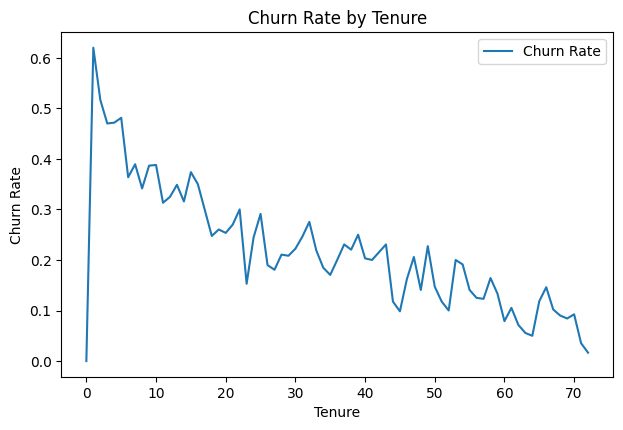

In [ ]:
relevant_features = data[['MonthlyCharges', 'tenure', 'TotalCharges', 'Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'Churn']]

# Group by categorical features and calculate churn rate
categorical_features = ['Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport']
for feature in categorical_features:
    churn_rate_by_feature = relevant_features.groupby([feature, 'Churn']).size().unstack().fillna(0)
    churn_rate_by_feature['Churn Rate'] = churn_rate_by_feature[1] / (churn_rate_by_feature[0] + churn_rate_by_feature[1])
    print(f"Churn Rate by {feature}:")
    print(churn_rate_by_feature)

# Visualize relationships with churn
plt.figure(figsize=(12, 8))

# Example: Churn rate by tenure
plt.subplot(2, 2, 1)
tenure_churn_rate = relevant_features.groupby(['tenure', 'Churn']).size().unstack().fillna(0)
tenure_churn_rate['Churn Rate'] = tenure_churn_rate[1] / (tenure_churn_rate[0] + tenure_churn_rate[1])
plt.plot(tenure_churn_rate['Churn Rate'], label='Churn Rate')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure')
plt.legend()

# Add more subplots for other features if needed

plt.tight_layout()
plt.show()

**Question 3**

In [ ]:
X = final_data.drop('Churn', axis=1)
y = final_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier()

param_grid = {
    'mlp__hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'mlp__activation': ['logistic', 'tanh', 'relu'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Cross-Validated Score: {:.2f}".format(grid_search.best_score_))

best_mlp = grid_search.best_estimator_
best_mlp.fit(X_train, y_train)

test_accuracy = best_mlp.score(X_test, y_test)
print("Test Accuracy: {:.2f}".format(test_accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Hyperparameters:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100,)}
Cross-Validated Score: 0.80
Test Accuracy: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
